# 1.  데이터 만들기

In [1]:
import numpy as np


In [2]:
num_points = 2000

In [3]:
vectors_set = [] 

### "continuous uniform" distribution 

In [7]:
help(np.random.random)

Help on built-in function random_sample:

random_sample(...) method of mtrand.RandomState instance
    random_sample(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random_sample` by `(b-a)` and add `a`::
    
      (b - a) * random_sample() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    out : float or ndarray of floats
        Array of random floats of shape `size` (unless ``size=None``, in which
        case a single float is returned).
    
    Examples
    --------
    >>> np.random.random_sample()
    0.47108547995356098
    >>> type(np.random.random_

### 정규분포 

In [8]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution.
    size : int or tuple of ints, optional
        Output shap

## 데이터 생성 

In [4]:
for i in range(num_points) :
    if np.random.random() > 0.5 :
        vectors_set.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9) ])
    else :
         vectors_set.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5) ])

In [10]:
len(vectors_set)

2000

### 리스트를 다차원 배열로 변경하기

In [5]:
a = np.array(vectors_set)

In [6]:
a

array([[ 2.61958741,  0.51984725],
       [ 2.77296467,  1.30892773],
       [ 0.00809315, -0.63972008],
       ...,
       [-0.98119818,  0.10645508],
       [ 3.01940755,  0.16954844],
       [ 3.04685735,  1.65542336]])

In [9]:
a.shape

(2000, 2)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [17]:
df = pd.DataFrame(vectors_set)

In [18]:
df.head()

,0,1
0,2.619587,0.519847
1,2.772965,1.308928
2,0.008093,-0.639720
3,2.584112,1.180358
4,3.677537,0.263585


In [19]:
df.columns = ["x","y"]

In [20]:
df.head()

,x,y
0,2.619587,0.519847
1,2.772965,1.308928
2,0.008093,-0.639720
3,2.584112,1.180358
4,3.677537,0.263585


In [25]:
help(sns.lmplot)

Help on function lmplot in module seaborn.regression:

lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most important
    comparison, followed by ``col`` and 

### 기본 lmplot 처리하면 회귀 직선을 그린다

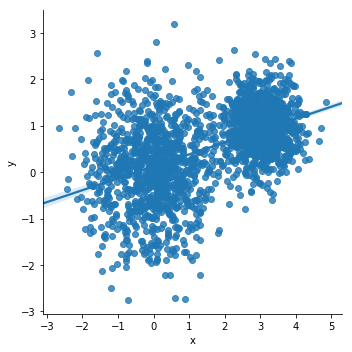

In [26]:
sns.lmplot("x","y", data=df)

### regplot을 삭제해서 분포만 확인한다

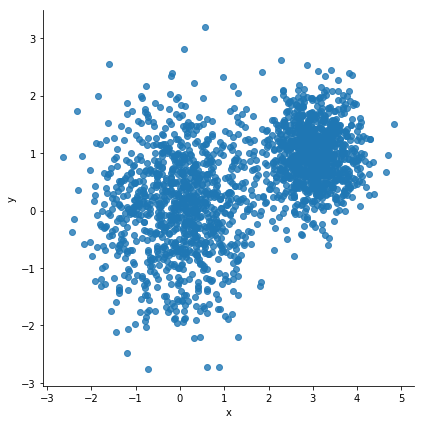

In [35]:
sns.lmplot("x","y", data=df, fit_reg=False, height=6)
plt.show()

### scatter 그래프로 그리기

In [30]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequence
        because th

###  matplotlib  그래프 사이즈 조정하기

In [33]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

### 산점도를 다시 그리기

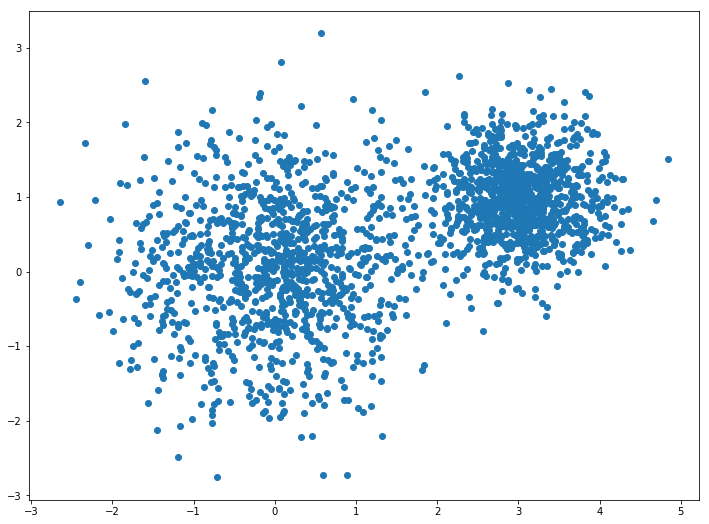

In [34]:
plt.scatter(df['x'], df['y'])

# 2. 텐서플로우로 모델하기

In [36]:
import tensorflow as tf

### 데이터를 텐서 상수로 변환하기

In [37]:
vectors = tf.constant(vectors_set)

In [38]:
k = 4

In [39]:
help(tf.slice)

Help on function slice in module tensorflow.python.ops.array_ops:

slice(input_, begin, size, name=None)
    Extracts a slice from a tensor.
    
    This operation extracts a slice of size `size` from a tensor `input` starting
    at the location specified by `begin`. The slice `size` is represented as a
    tensor shape, where `size[i]` is the number of elements of the 'i'th dimension
    of `input` that you want to slice. The starting location (`begin`) for the
    slice is represented as an offset in each dimension of `input`. In other
    words, `begin[i]` is the offset into the 'i'th dimension of `input` that you
    want to slice from.
    
    Note that `tf.Tensor.__getitem__` is typically a more pythonic way to
    perform slices, as it allows you to write `foo[3:7, :-2]` instead of
    `tf.slice(foo, [3, 0], [4, foo.get_shape()[1]-2])`.
    
    `begin` is zero-based; `size` is one-based. If `size[i]` is -1,
    all remaining elements in dimension i are included in the
    sl

### 특정 중심값을 추출

In [40]:
slice_vct = tf.slice(tf.random_shuffle(vectors), [0,0], [k,-1])

In [41]:
slice_vct

<tf.Tensor 'Slice:0' shape=(4, 2) dtype=float32>

In [43]:
with tf.Session() as sess : 
    print(sess.run(slice_vct))

[[2.5687127  0.40709978]
 [2.5452487  0.8337919 ]
 [3.2516782  0.77504057]
 [3.7237155  0.53728586]]


In [45]:
centroides = tf.Variable(slice_vct)

Instructions for updating:
Colocations handled automatically by placer.


### 0번째 차원을 확대 : 2차원을 3차원으로 변경

In [44]:
expanded_vectors = tf.expand_dims(vectors, 0)

In [48]:
with tf.Session() as sess : 
    print(sess.run(expanded_vectors))
    print(sess.run(tf.rank(expanded_vectors)))

[[[ 2.6195874   0.5198473 ]
  [ 2.7729647   1.3089278 ]
  [ 0.00809315 -0.6397201 ]
  ...
  [-0.9811982   0.10645508]
  [ 3.0194075   0.16954844]
  [ 3.0468574   1.6554234 ]]]
3


### 1 번축을 추가

In [49]:
expanded_centroides = tf.expand_dims(centroides, 1)

In [54]:
with tf.Session() as sess : 
    sess.run(tf.global_variables_initializer())
    print(sess.run(centroides))

[[-0.40819505 -0.6710559 ]
 [-0.91781765  0.11133087]
 [ 2.7109554   1.5747927 ]
 [ 1.3136693   0.87386286]]


In [55]:
with tf.Session() as sess : 
    sess.run(tf.global_variables_initializer())
    print(sess.run(expanded_centroides))
    print(sess.run(tf.rank(expanded_centroides)))

[[[-1.0055274   0.4779409 ]]

 [[ 2.4790618   0.5749245 ]]

 [[ 1.4684147  -0.46181467]]

 [[ 0.04162413  0.9060865 ]]]
3


In [59]:
help(tf.reduce_sum)

Help on function reduce_sum_v1 in module tensorflow.python.ops.math_ops:

reduce_sum_v1(input_tensor, axis=None, keepdims=None, name=None, reduction_indices=None, keep_dims=None)
    Computes the sum of elements across dimensions of a tensor. (deprecated arguments)
    
    Instructions for updating:
    keep_dims is deprecated, use keepdims instead
    
    Reduces `input_tensor` along the dimensions given in `axis`.
    Unless `keepdims` is true, the rank of the tensor is reduced by 1 for each
    entry in `axis`. If `keepdims` is true, the reduced dimensions
    are retained with length 1.
    
    If `axis` is None, all dimensions are reduced, and a
    tensor with a single element is returned.
    
    For example:
    
    ```python
    x = tf.constant([[1, 1, 1], [1, 1, 1]])
    tf.reduce_sum(x)  # 6
    tf.reduce_sum(x, 0)  # [2, 2, 2]
    tf.reduce_sum(x, 1)  # [3, 3]
    tf.reduce_sum(x, 1, keepdims=True)  # [[3], [3]]
    tf.reduce_sum(x, [0, 1])  # 6
    ```
    
    Args:


### 2 번 축을 기준으로 reduce_sum

In [58]:
assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroides)),2),0)

In [66]:
c=1

In [69]:
tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])

<tf.Tensor 'Reshape_8:0' shape=(1, ?) dtype=int64>

In [70]:
tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1]))

<tf.Tensor 'GatherV2_8:0' shape=(1, ?, 2) dtype=float32>

In [71]:
tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])), reduction_indices=[1])

<tf.Tensor 'Mean_8:0' shape=(1, 2) dtype=float32>

In [72]:
 [ tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])), reduction_indices=[1]) for c in range(k)]

[<tf.Tensor 'Mean_9:0' shape=(1, 2) dtype=float32>,
 <tf.Tensor 'Mean_10:0' shape=(1, 2) dtype=float32>,
 <tf.Tensor 'Mean_11:0' shape=(1, 2) dtype=float32>,
 <tf.Tensor 'Mean_12:0' shape=(1, 2) dtype=float32>]

In [76]:
help(tf.concat)

Help on function concat in module tensorflow.python.ops.array_ops:

concat(values, axis, name='concat')
    Concatenates tensors along one dimension.
    
    Concatenates the list of tensors `values` along dimension `axis`.  If
    `values[i].shape = [D0, D1, ... Daxis(i), ...Dn]`, the concatenated
    result has shape
    
        [D0, D1, ... Raxis, ...Dn]
    
    where
    
        Raxis = sum(Daxis(i))
    
    That is, the data from the input tensors is joined along the `axis`
    dimension.
    
    The number of dimensions of the input tensors must match, and all dimensions
    except `axis` must be equal.
    
    For example:
    
    ```python
    t1 = [[1, 2, 3], [4, 5, 6]]
    t2 = [[7, 8, 9], [10, 11, 12]]
    tf.concat([t1, t2], 0)  # [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
    tf.concat([t1, t2], 1)  # [[1, 2, 3, 7, 8, 9], [4, 5, 6, 10, 11, 12]]
    
    # tensor t3 with shape [2, 3]
    # tensor t4 with shape [2, 3]
    tf.shape(tf.concat([t3, t4], 0))  # [4, 

In [78]:
 tf.concat([ tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])), reduction_indices=[1]) for c in range(k)],0)

<tf.Tensor 'concat_3:0' shape=(4, 2) dtype=float32>

In [79]:
means = tf.concat([ tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])), reduction_indices=[1]) for c in range(k)], 0)

In [80]:
update_centroides = tf.assign(centroides, means)

In [81]:
init_op = tf.global_variables_initializer()

In [82]:
sess = tf.Session()

In [83]:
sess.run(init_op)

In [84]:
for step in range(10) :
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])

In [85]:
centroid_values

array([[ 0.53421  ,  0.6383587],
       [-1.0390905,  0.3351508],
       [ 0.1253181, -0.8707863],
       [ 3.029251 ,  0.977069 ]], dtype=float32)

In [86]:
assignment_values

array([3, 3, 2, ..., 1, 3, 3])

In [112]:
data ={'x':[], 'y':[], 'cluster':[]}

In [113]:
for i in range(len(assignment_values)) :
    data['x'].append(vectors_set[i][0])
    data['y'].append(vectors_set[i][1])
    data['cluster'].append(assignment_values[i])

In [114]:
df_ = pd.DataFrame(data)

In [115]:
df_.head()

,x,y,cluster
0,2.619587,0.519847,3
1,2.772965,1.308928,3
2,0.008093,-0.639720,2
3,2.584112,1.180358,3
4,3.677537,0.263585,3


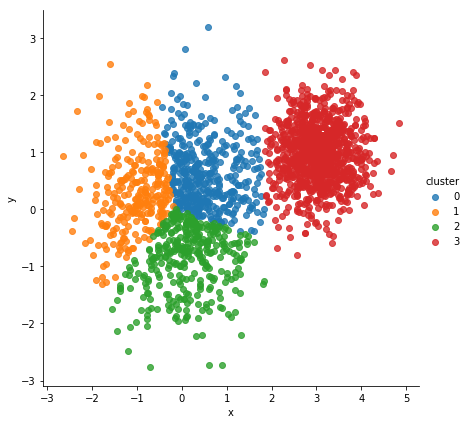

In [117]:
sns.lmplot('x','y',  hue='cluster',data=df_,  fit_reg=False, height=6) # height=6, hue="cluster", legend=False)

In [118]:
a = np.uint8([1,2,3,4])

In [119]:
a

array([1, 2, 3, 4], dtype=uint8)